**Experiment 12**

Using CNN for Image ClassificatioN

In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 6.7 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.6 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 25.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
ERROR: pip's dependency resolver does not currently take into ac

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Flatten, Dense
from keras.datasets import cifar10

Loading Cifar-10 dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


Using ImageDataGenerator for Real-time data augmentation

In [4]:
img_gen = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range = 30, rescale = 1./255)
train_gen = img_gen.flow(x_train, y_train, batch_size = 32)
test_gen = img_gen.flow(x_test, y_test)

Building a CNN Model for Image Classification

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=[32,32,3], activation='relu',strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(input_shape=[32,32,32]))
model.add(layers.ReLU(input_shape=[32,32,32]))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, input_shape=[32,32,32]))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), input_shape=[16,16,32], activation='relu',strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(input_shape=[16,16,64]))
model.add(layers.ReLU(input_shape=[32,32,32]))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, input_shape=[16,16,64]))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), input_shape=[8,8,64], activation='relu',strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(input_shape=[8,8,128]))
model.add(layers.ReLU(input_shape=[32,32,32]))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, input_shape=[8,8,128]))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), input_shape=[4,4,128], activation='relu', padding='same'))
model.add(layers.BatchNormalization(input_shape=[4,4,256]))
model.add(layers.ReLU(input_shape=[32,32,32]))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2, input_shape=[4,4,256]))
model.add(layers.Flatten(input_shape=[2,2,256]))
model.add(layers.Dense(256, activation='relu', input_shape=[1024]))
model.add(layers.Dense(64, activation='relu', input_shape=[256]))
model.add(layers.Dense(10, activation='softmax', input_shape=[64]))

2022-11-19 05:29:55.878653: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16, 16, 64)        0

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = x_train.shape[0] // 32
r = model.fit(train_gen, steps_per_epoch=steps_per_epoch, validation_data=test_gen, epochs = 20)

Epoch 1/20


2022-11-19 05:29:56.327847: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1562/1562 [==============================] - 87s 55ms/step - loss: 1.4864 - accuracy: 0.0979 - val_loss: 1.3012 - val_accuracy: 0.1290
Epoch 2/20
1562/1562 [==============================] - 82s 53ms/step - loss: 1.1573 - accuracy: 0.1025 - val_loss: 1.8205 - val_accuracy: 0.0279
Epoch 3/20
1562/1562 [==============================] - 84s 54ms/step - loss: 1.0093 - accuracy: 0.1015 - val_loss: 1.0420 - val_accuracy: 0.0788
Epoch 4/20
1562/1562 [==============================] - 84s 54ms/step - loss: 0.9264 - accuracy: 0.1016 - val_loss: 1.0548 - val_accuracy: 0.0637
Epoch 5/20
1562/1562 [==============================] - 82s 53ms/step - loss: 0.8694 - accuracy: 0.1003 - val_loss: 0.9507 - val_accuracy: 0.1004
Epoch 6/20
1562/1562 [==============================] - 83s 53ms/step - loss: 0.8161 - accuracy: 0.1029 - val_loss: 1.0960 - val_accuracy: 0.0512
Epoch 7/20
1562/1562 [==============================] - 81s 52ms/step - loss: 0.7842 - accuracy: 0.1023 - val_loss: 0.8858 - val_accura

In [8]:
model.evaluate(test_gen)

313/313 [==============================] - 7s 22ms/step - loss: 0.7189 - accuracy: 0.1031


[0.7189467549324036, 0.1031000018119812]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16, 16, 64)        0

In [10]:
#Save your model
model.save('PES1UG20CS596.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16, 16, 64)        0

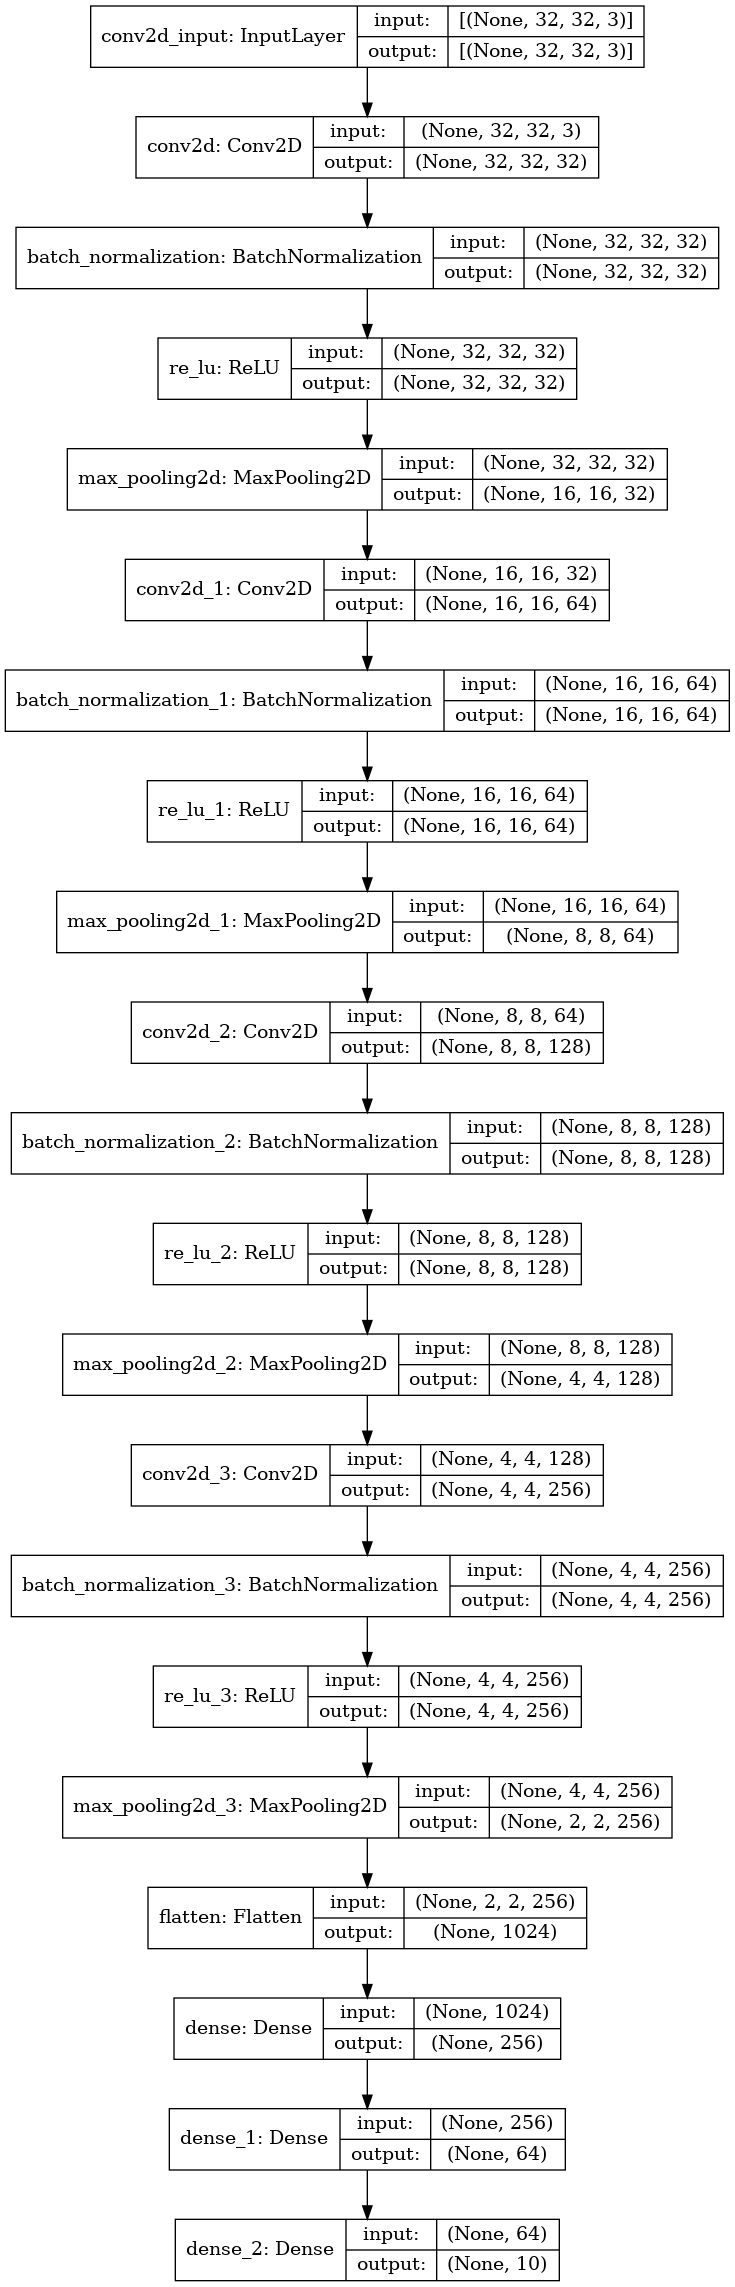

In [11]:
#For your Verification Purposes:
model_n=models.load_model("PES1UG20CS596.h5") # "SRN.h5"
model_n.summary()

#Verify your model using this i.e ,if the Image generated after this matches the Flow chart Image in PDF file then your output is most likely correct
utils.plot_model(model, to_file="my_model.png", show_shapes=True)